In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Создадим-и-обучим-стандартные-модели-линейной-регрессии-из-sklearn-на-исходных-и-преобразованных-данных.-Затем-сравним-кросс-валидацией-качество-моделей:" data-toc-modified-id="Создадим-и-обучим-стандартные-модели-линейной-регрессии-из-sklearn-на-исходных-и-преобразованных-данных.-Затем-сравним-кросс-валидацией-качество-моделей:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создадим и обучим стандартные модели линейной регрессии из sklearn на исходных и преобразованных данных. Затем сравним кросс валидацией качество моделей:</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.shape

(5000, 5)

In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
df.columns

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


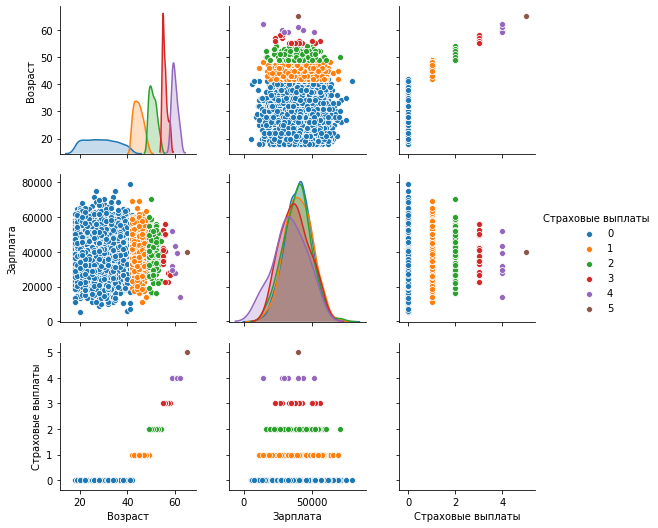

In [6]:
sns.pairplot(df[['Возраст', 'Зарплата', 'Страховые выплаты']], hue='Страховые выплаты')

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится.

**Обоснование:** Умножим признаки на обратимую матрицу Q, тогда предсказания можно переписать ввиде:

$$
a = XQ*w',
$$
где w' - новый вектор весов линейной регрессии (нулевой элемент равен сдвигу).

Тогда задачу обучения перепишем ввиде:

$$
w' = \arg\min_w MSE(XQw', y)
$$

Формула обучения:

$$
w' = ((XQ)^T XQ)^{-1} (XQ)^T y
$$
Проведением несложных преобразований с условиями из начальной задачи обучения (без преобразования), получается формула взаимосвязи w и w':
$$
w' = (Q^TX^TXQ)^{-1} (XQ)^T y
$$

$$
w' = ((Q^T(X^TXQ))^{-1} Q^TX^T y
$$

$$
w' = ((X^TXQ)^{-1}(Q^T)^{-1} Q^TX^T y
$$
Сокращаем матрицы $(Q^T)^{-1} и  Q^T$ (умножение матрицы на свою обратную - есть единичная матрица)
$$
w' = (X^TXQ)^{-1} X^T y
$$
расскываем выражение $(X^TXQ)^{-1}$
$$
w' = Q^{-1}(X^TX)^{-1} X^T y
$$


и используем подстановку: $w = (X^T X)^{-1} X^T y$
$$
w' = Q^{-1}w
$$
Т.к. мы установили однозначную взаимосвязь векторов весов для исходной модели и после преобразования, а также по условию преобразования, матрицы X и Q - не вырождены (обратимы), то качество линейной модели будет идентично для обоих моделей.

## Алгоритм преобразования

In [7]:
from numpy.random import RandomState
state = RandomState(12345)

In [8]:
X = df.drop('Страховые выплаты', axis=1)
y = df['Страховые выплаты']

In [9]:
class LinearRegressor:
    def transformation(self, features):
        rng = np.random.RandomState(12345)
        P = rng.normal(size=(4,4))
        return(features@P)
        
    def fit(self, train_features, train_target):
        #X = np.concatenate((np.ones(train_features.shape[0],1), train_features), axis=1)
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T@X)@X.T@y
        self.w = w[1:]
        self.w0 = w[0]
        return(self.w, self.w0)
        
    def predict(self, features_test):
        self.predict = (features_test @ self.w) + self.w0
        return((features_test @ self.w) + self.w0)
        
    def score(self, y_true, y_pred):
        return (1 - (((y_true - y_pred)** 2).sum() / ((y_true - y_true.mean()) ** 2).sum()) )
    
    def cross_val(self, model, features, target):
        scores = []
        # зададим размер блока, если их всего три
        sample_size = math.ceil(len(features)/3)
        for i in range(0, len(features), sample_size):
            valid_indexes = list(range(i,i+sample_size))
            train_indexes = list(range(0, i)) + list(range(i+sample_size, len(features)))
            
            target_train =  target.loc[train_indexes]
            features_train = features.loc[train_indexes]
    
            features_valid = features.loc[valid_indexes]
            target_valid =  target.loc[valid_indexes]
            #пришлось создать экземпляр класса внутри самого класса, т.к. при попытке задать
            #экземпляр класса как аргумент для функции cross_val, возникла ошибка
            #(TypeError: 'Series' object is not callable)
            model = LinearRegressor()
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            score = model.score(target_valid, predictions)
            scores.append(score)
        self.final_score = sum(scores)/len(scores)
        return (scores)

**Обоснование**

Покажем алгоритм в действии: качество на описываемых выборках - не меняется.

In [10]:
m = LinearRegressor()
features_tranformed = m.transformation(X)

In [11]:
m.cross_val(m, features_tranformed, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


[0.4189738475434316, 0.4249089813851482, 0.42999753139341146]

In [12]:
m.final_score

0.42462678677399707

In [13]:
z = LinearRegressor()
z.fit(X, y)
#z.predict(y)
z.cross_val(z,X,y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


[0.41897383652566533, 0.4249089803802155, 0.42999752162034255]

In [14]:
print('Качество на преобразованной выборке:', m.final_score, '\nКачество на исходной выборке:', z.final_score)

Качество на преобразованной выборке: 0.42462678677399707 
Качество на исходной выборке: 0.4246267795087411


## Проверка алгоритма

Создадим случайную квадратную матрицу с подходящим под исходные данные размером. Проверим, что она не вырождена:

In [23]:
P = np.random.normal(size=(4,4))
P


array([[-1.59685949,  0.36404146,  0.72092586, -0.51750624],
       [ 0.20738257,  1.1429192 , -0.5412674 ,  0.0424792 ],
       [ 0.42408777,  0.53872183, -1.15359577, -0.92140074],
       [ 1.50424619,  0.25284919, -1.14685894,  0.23086524]])

In [24]:
np.linalg.det(P)

0.14854729263192634

In [25]:
np.linalg.inv(P)

array([[ -8.97063819,   3.84037557,   2.67436083, -10.14158419],
       [ -3.91710488,   2.66978666,   1.11056758,  -4.8394415 ],
       [-11.1194393 ,   5.02845361,   3.12502039, -13.37831456],
       [  7.50245791,  -2.9670848 ,  -3.11760068,   9.2523612 ]])

### Создадим и обучим стандартные модели линейной регрессии из sklearn на исходных и преобразованных данных. Затем сравним кросс валидацией качество моделей:

In [26]:
model1 = LinearRegression()
model1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
cross_val_score(model1, X, y, cv=10).mean()

0.414600847386013

In [28]:
model2 = LinearRegression()
model2.fit(X@P, y)
cross_val_score(model2, X, y, cv=10).mean()

0.414600847386013

## Вывод:  
Разработан алгоритм преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснована корректность его работы.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования